<a href="https://colab.research.google.com/github/ValentinaSalazarM/2023-DeepLearning/blob/main/Laboratorio%201/L1%20-%20Pr%C3%A1ctica1%20-%20HandsOn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. Importación de paquetes

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install keras-tuner

     \ 22.6 MB 32.6 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 47.2 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357350 sha256=a586a9125f76c9ec7868b15dc836996ed4f3c418dbff5e53e105a440b0045cae
  Stored in directory: /tmp/pip-ephem-wheel-cache-k343msa5/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=03141b6e751f07d832ffe5fb4c6607223f5dab5288941f50d11b81e7ca1795f2
  Stored in directory: /root/

In [ ]:
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport
from numpy import sqrt

import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils.vis_utils import plot_model
import keras_tuner as kt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

<ipython-input-2-7bd88fe72482>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
<ipython-input-2-7bd88fe72482>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-deep")


### 1. Entendimiento de los datos

In [ ]:
url = 'https://raw.githubusercontent.com/yacanom/MINE-4210_202320_ANALISIS_CON_DEEP_LEARNING/main/Laboratorio%201/data/data.csv'
data = pd.read_csv(url)

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=33)

### 2. Preparación de los datos

In [ ]:
train = train.drop(['Employee ID'], axis=1)
train = train.dropna(subset=['Burn Rate'])
train = train.dropna(subset=['Mental Fatigue Score', 'Resource Allocation'])
train.loc[:, 'Gender'] = train['Gender'].map({'Female': 1, 'Male': 0})
train.loc[:, 'Company Type'] = train['Company Type'].map({'Service': 1, 'Product': 0})
train.loc[:, 'WFH Setup Available'] = train['WFH Setup Available'].map({'Yes': 1, 'No': 0})

<ipython-input-5-23dbe2405d38>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:, 'Gender'] = train['Gender'].map({'Female': 1, 'Male': 0})
<ipython-input-5-23dbe2405d38>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:, 'Company Type'] = train['Company Type'].map({'Service': 1, 'Product': 0})
<ipython-input-5-23dbe2405d38>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.col

In [ ]:
from datetime import datetime
currentDate = datetime.now()
train.loc[:, 'Date of Joining'] = pd.to_datetime(train['Date of Joining'])
train['Days Employed'] = (currentDate-train['Date of Joining']).dt.days
train = train.dropna(subset=['Date of Joining'])
train = train.reindex(columns=['Days Employed', 'Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'])


<ipython-input-6-f9a8a7680697>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:, 'Date of Joining'] = pd.to_datetime(train['Date of Joining'])


In [ ]:
train.head()

,Days Employed,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
1567,5480,1,1,1,1.0,3.0,4.2,0.32
9298,5474,0,0,0,3.0,6.0,6.6,0.61
9931,5410,1,0,1,1.0,2.0,3.0,0.19
16989,5440,1,1,0,3.0,6.0,5.4,0.34
3368,5478,0,0,1,1.0,2.0,3.1,0.16


In [ ]:
X_n = train.drop(['Burn Rate'], axis=1)
Y = train['Burn Rate']
display(X_n.head())
Y.head()

,Days Employed,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
1567,5480,1,1,1,1.0,3.0,4.2
9298,5474,0,0,0,3.0,6.0,6.6
9931,5410,1,0,1,1.0,2.0,3.0
16989,5440,1,1,0,3.0,6.0,5.4
3368,5478,0,0,1,1.0,2.0,3.1


1567     0.32
9298     0.61
9931     0.19
16989    0.34
3368     0.16
Name: Burn Rate, dtype: float64

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X_n)
display(pd.DataFrame(X, columns=X_n.columns))

Y = (Y - Y.mean())/Y.std()
display(pd.DataFrame(Y))

,Days Employed,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,-0.527590,0.954683,0.724362,0.928835,-1.039204,-0.725953,-0.788985
1,-0.584588,-1.047468,-1.380526,-1.076617,0.724906,0.740972,0.454407
2,-1.192567,0.954683,-1.380526,0.928835,-1.039204,-1.214929,-1.410681
3,-0.907577,0.954683,0.724362,-1.076617,0.724906,0.740972,-0.167289
4,-0.546589,-1.047468,-1.380526,0.928835,-1.039204,-1.214929,-1.358873
...,...,...,...,...,...,...,...
14841,1.049358,0.954683,-1.380526,0.928835,-0.157149,0.251997,-0.011865
14842,-0.917077,-1.047468,0.724362,-1.076617,-0.157149,-0.725953,-0.478137
14843,-1.648552,-1.047468,0.724362,-1.076617,-0.157149,0.251997,1.179719
14844,1.334349,-1.047468,0.724362,0.928835,0.724906,0.251997,0.298983


,Burn Rate
1567,-0.664112
9298,0.797750
9931,-1.319429
16989,-0.563293
3368,-1.470656
...,...
2109,-0.462475
10435,-0.210430
57,0.797750
578,-0.059203


## 3. Búsqueda de hiperparámetros

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=33)
display(pd.DataFrame(X_val, columns=X_n.columns).head())
y_val

,Days Employed,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,-1.496557,0.954683,0.724362,0.928835,1.606960,1.718923,1.490567
1,0.773867,-1.047468,0.724362,-1.076617,0.724906,0.251997,1.335143
2,0.469877,-1.047468,-1.380526,0.928835,0.724906,0.740972,0.765255
3,1.315349,0.954683,0.724362,-1.076617,0.724906,0.251997,0.350791
4,-0.594087,0.954683,0.724362,-1.076617,-0.157149,0.251997,0.350791


21502    1.755522
21436    0.948977
7252     1.150613
13918    0.192842
6831     0.092024
           ...   
22640    1.453067
1725     0.344069
5871     0.545705
6887    -0.311248
17807   -0.412066
Name: Burn Rate, Length: 2970, dtype: float64

In [ ]:
def entrenarRed(hp):
    clf = Sequential(name='HandsOn_1')
    neuronas = hp.Choice('neuronas', [5, 10, 15, 20])

    clf.add(Input(shape=(X.shape[1]), name='Capa_Entrada'))
    clf.add(Dense(neuronas,activation='relu',name='Capa_Oculta1'))
    clf.add(Dense(neuronas,activation='relu',name='Capa_Oculta2'))
    clf.add(Dense(1,activation='linear',name='Capa_Salida'))

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    clf.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', tf.keras.metrics.RootMeanSquaredError()])

    return clf

tuner = kt.RandomSearch(
    entrenarRed,
    objective="val_mse",
    seed=123,
    max_trials=16,
    project_name='L1_HansOn_P1')

In [ ]:
tuner.search(X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=10,
    epochs=30,
)

best_model = tuner.get_best_models()[0]

Trial 4 Complete [00h 01m 32s]
val_mse: 0.07048942148685455

Best val_mse So Far: 0.07000655680894852
Total elapsed time: 00h 07m 48s


In [ ]:
#best_model.save('hands_on_best_model.h5')
best_model.summary()

Model: "HandsOn_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Oculta1 (Dense)        (None, 20)                160       
                                                                 
 Capa_Oculta2 (Dense)        (None, 20)                420       
                                                                 
 Capa_Salida (Dense)         (None, 1)                 21        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = best_model.predict(X, batch_size=1)
y_pred

14846/14846 [==============================] - 21s 1ms/step


array([[-0.7899146 ],
       [ 0.57045984],
       [-1.3466668 ],
       ...,
       [ 0.83245313],
       [ 0.05573964],
       [ 0.41584423]], dtype=float32)

In [ ]:
n,p = X.shape

print('------------ Resultados entrenamiento (2 neuronas) ------------')
print("Mean Squared Error (MSE): %.5f" % mean_squared_error(Y,y_pred))
print("Mean Absolute Error (MAE): %.5f" % mean_absolute_error(Y,y_pred))
print("Root Mean Squared Error (RMSE): %.5f" % sqrt(mean_squared_error(Y,y_pred)))

------------ Resultados entrenamiento (2 neuronas) ------------
Mean Squared Error (MSE): 0.07187
Mean Absolute Error (MAE): 0.21756
Root Mean Squared Error (RMSE): 0.26809


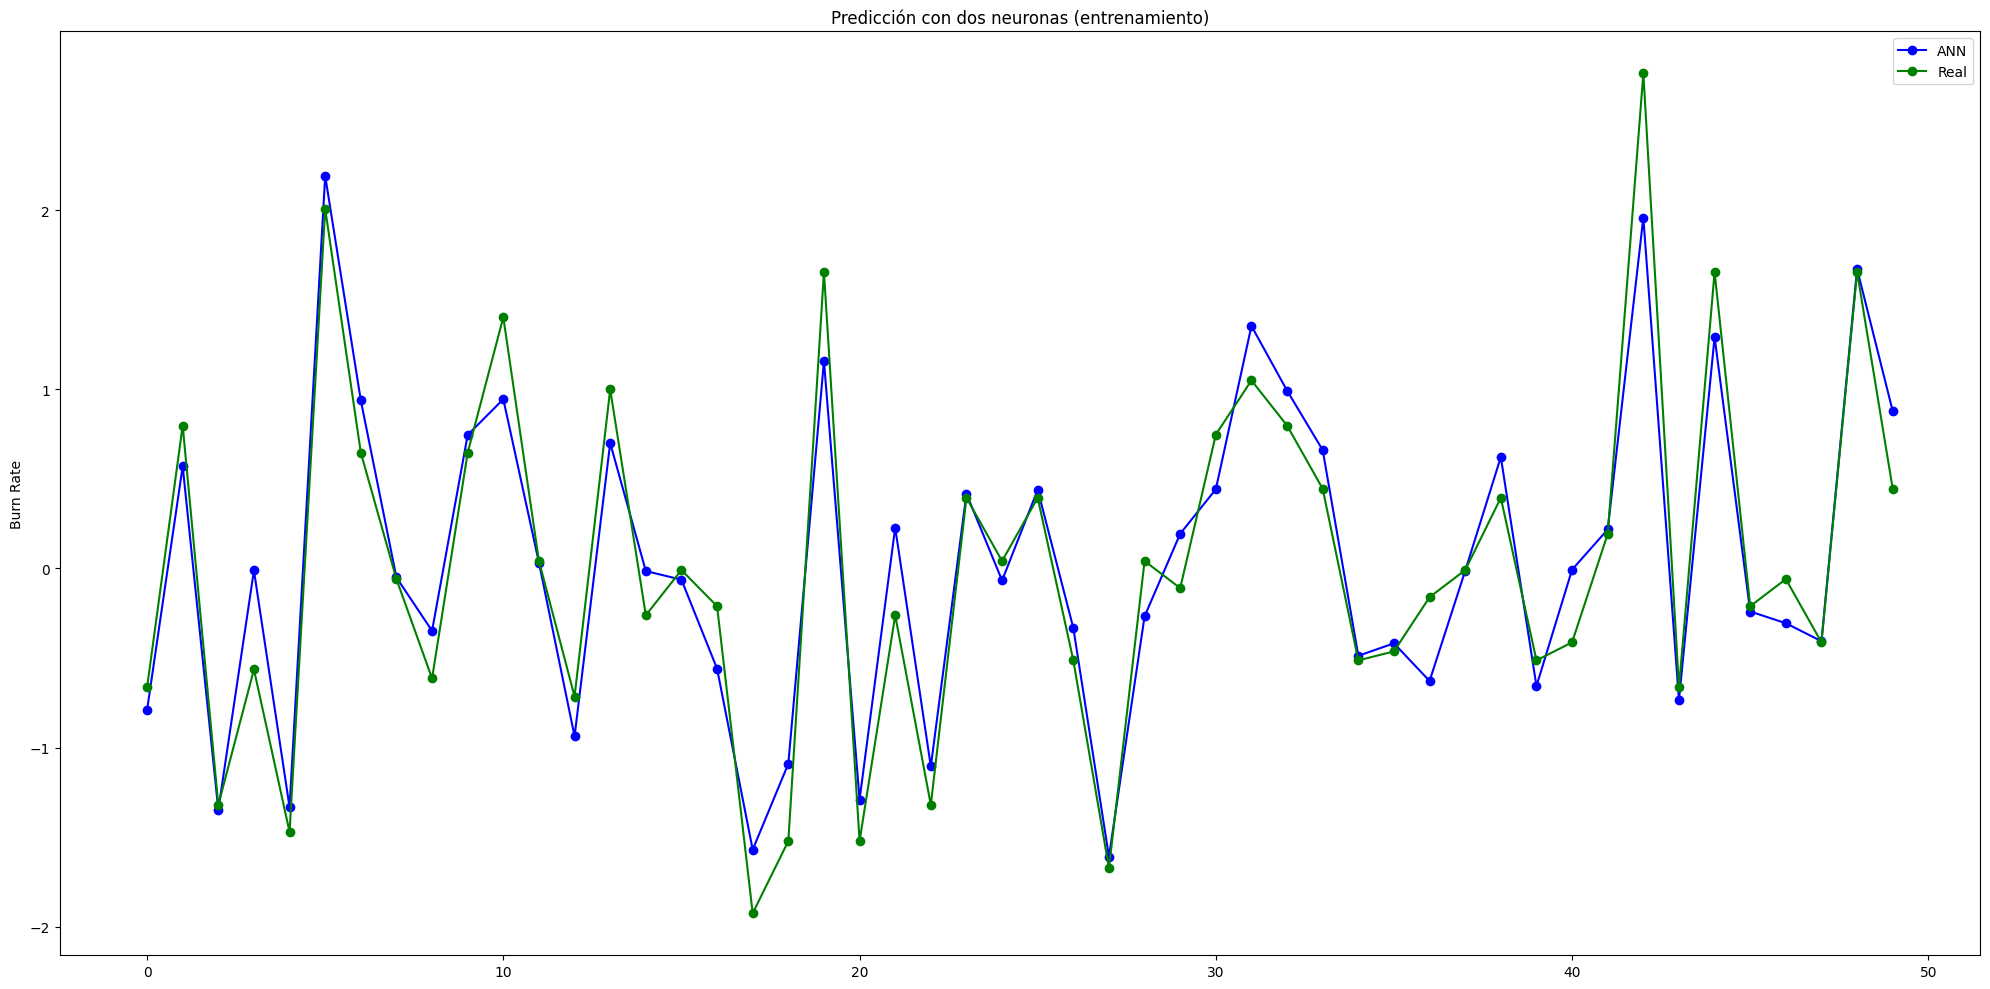

In [ ]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(Y[:50])))
axs.plot(xvals, y_pred[:50],'bo-', label='ANN')
axs.plot(xvals, Y[:50],'go-', label='Real')

axs.set(title='Predicción con dos capas (entrenamiento)',ylabel=Y.name)
axs.legend()

plt.tight_layout()
plt.show()

### Evaluación con datos desconocidos

In [ ]:
#1 Eliminamos la columna Employee ID, dado que por ser valores únicos no son datos que ayude al modelo a realizar la predicción.
test = test.drop(['Employee ID'], axis=1)

#2 Eliminamos valores nulos
test = test.dropna(subset=['Burn Rate'])
test = test.dropna(subset=['Mental Fatigue Score', 'Resource Allocation'])

#3 Ahora pasamos las variables categóricas a numéricas. Empezamos con 'Gender', 'Company Type' y 'WFH Setup Available' que solo tienen dos opcines cada una
test.loc[:, 'Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
test.loc[:, 'Company Type'] = test['Company Type'].map({'Service': 1, 'Product': 0})
test.loc[:, 'WFH Setup Available'] = test['WFH Setup Available'].map({'Yes': 1, 'No': 0})

#4 Transformación de la columna de fecha
test.loc[:, 'Date of Joining'] = pd.to_datetime(test['Date of Joining'])
test['Days Employed'] = (currentDate-test['Date of Joining']).dt.days
test = test.dropna(subset=['Date of Joining'])
test = test.reindex(columns=['Days Employed', 'Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'])

#Dividimos nuestros datos en la características y los valores a predecir
X_n = test.drop(['Burn Rate'], axis=1)
Y = test['Burn Rate']
display(X_n.head())
Y.head()

#Escalamos los datos
X_test = scaler.fit_transform(X_n)
display(pd.DataFrame(X_test, columns=X_n.columns))

y_test = (Y - Y.mean())/Y.std()
display(pd.DataFrame(y_test))

<ipython-input-19-e8f2646dae26>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:, 'Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
<ipython-input-19-e8f2646dae26>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:, 'Company Type'] = test['Company Type'].map({'Service': 1, 'Product': 0})
<ipython-input-19-e8f2646dae26>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.co

,Days Employed,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
11358,5641,1,1,1,2.0,3.0,6.7
18573,5671,1,1,1,2.0,4.0,6.1
3385,5696,1,0,1,0.0,1.0,2.7
21788,5470,0,1,0,3.0,8.0,8.5
18503,5567,0,0,1,2.0,5.0,6.1


,Days Employed,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,1.002336,0.943880,0.732335,0.904144,-0.162988,-0.731128,0.494969
1,1.287107,0.943880,0.732335,0.904144,-0.162988,-0.241792,0.175999
2,1.524416,0.943880,-1.365495,0.904144,-1.931768,-1.709800,-1.631500
3,-0.620857,-1.059457,0.732335,-1.106019,0.721401,1.715550,1.451880
4,0.299902,-1.059457,-1.365495,0.904144,-0.162988,0.247543,0.175999
...,...,...,...,...,...,...,...
3739,-1.199891,0.943880,-1.365495,-1.106019,-0.162988,-0.731128,0.282322
3740,0.223963,0.943880,-1.365495,0.904144,2.490180,2.694222,1.930336
3741,0.537211,0.943880,0.732335,0.904144,-1.047378,-0.731128,-0.674589
3742,-1.266337,-1.059457,0.732335,0.904144,-0.162988,-0.241792,-1.099882


,Burn Rate
11358,0.228784
18573,-0.282111
3385,-1.354990
21788,1.710378
18503,0.688589
...,...
19493,0.228784
3747,1.761468
3614,-0.282111
3601,-0.997364


In [ ]:
y_pred = best_model.predict(X_test, batch_size=1)
y_pred

3744/3744 [==============================] - 5s 1ms/step


array([[ 0.07017665],
       [-0.04494323],
       [-1.5693313 ],
       ...,
       [-0.70901334],
       [-0.93615174],
       [-0.3533735 ]], dtype=float32)

In [ ]:
n,p = X.shape

print('------------ Resultados test (2 neuronas) ------------')
print("Mean Squared Error (MSE): %.5f" % mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE): %.5f" % mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %.5f" % sqrt(mean_squared_error(y_test, y_pred)))

------------ Resultados test (2 neuronas) ------------
Mean Squared Error (MSE): 0.07816
Mean Absolute Error (MAE): 0.22816
Root Mean Squared Error (RMSE): 0.27956


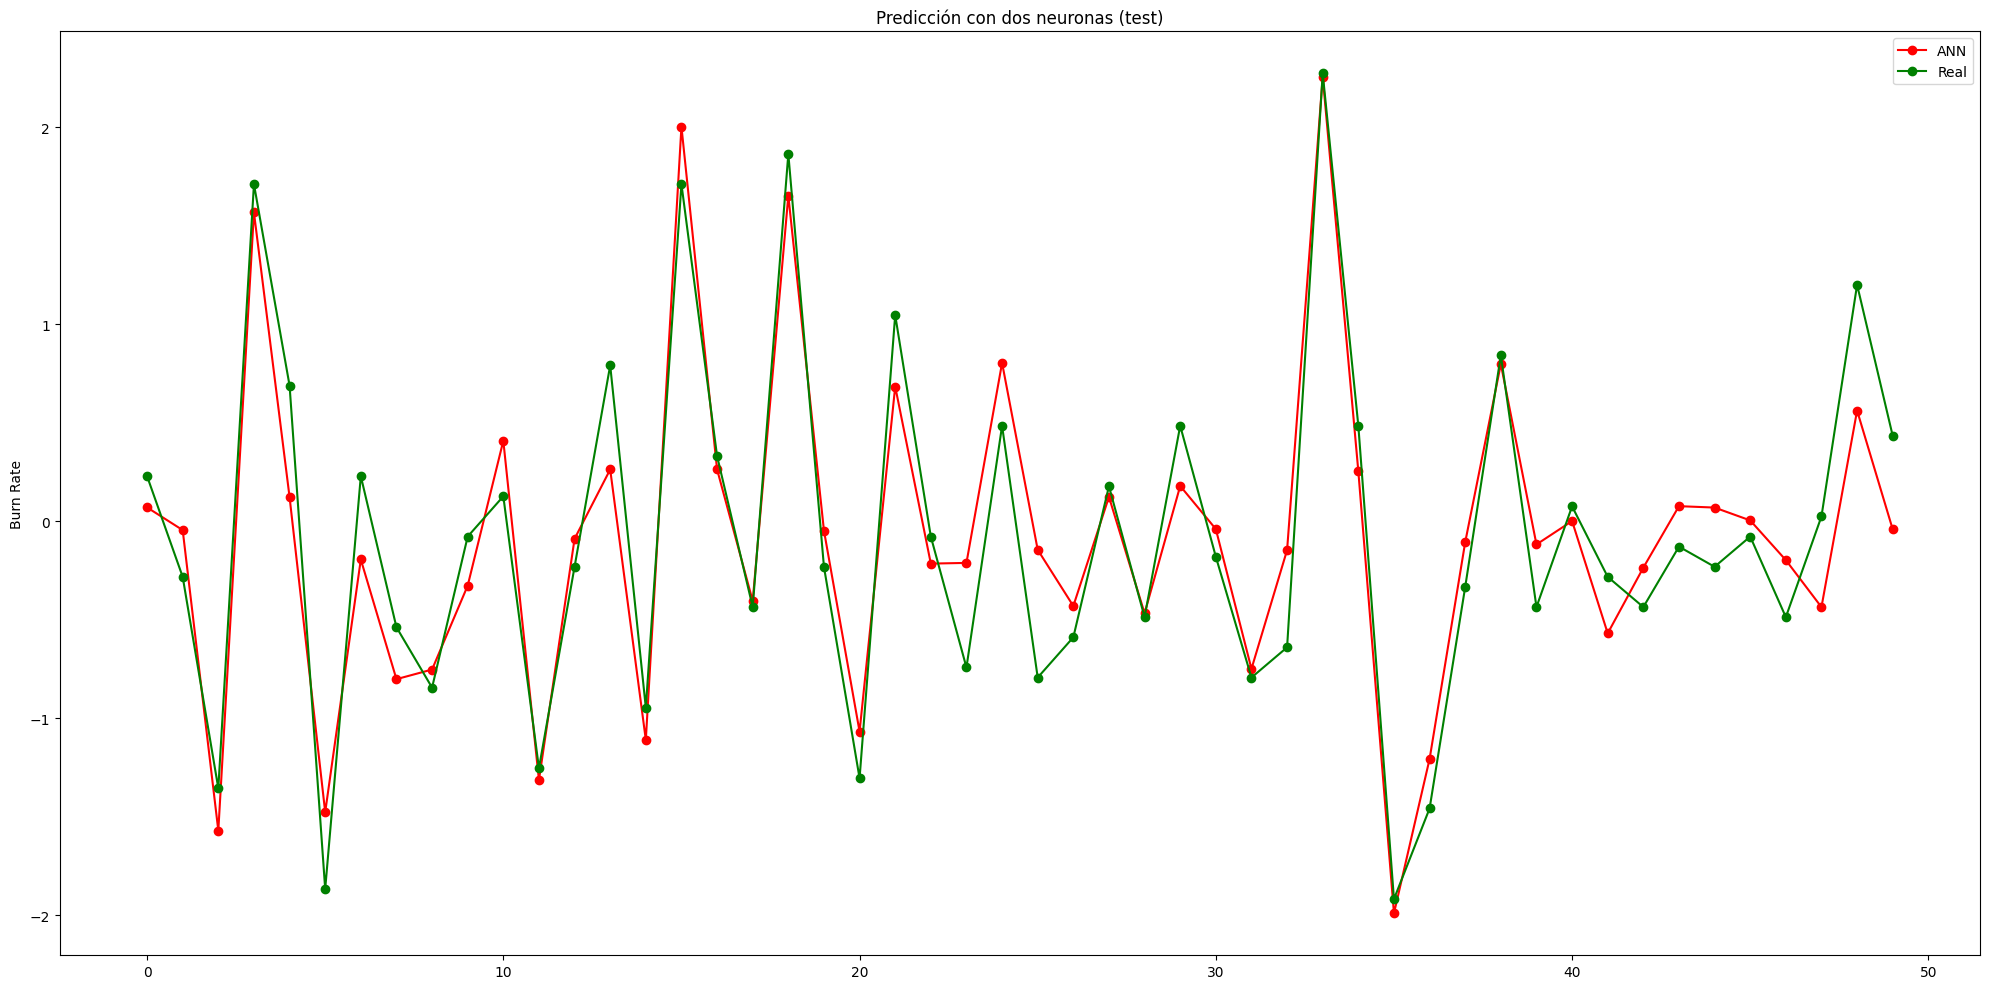

In [ ]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_test[:50])))
axs.plot(xvals, y_pred[:50],'ro-', label='ANN')
axs.plot(xvals, y_test[:50],'go-', label='Real')

axs.set(title='Predicción con dos neuronas (test)',ylabel=Y.name)
axs.legend()

plt.tight_layout()
plt.show()

## 2.  ¿Cómo son los resultados si  en la capa de salida se usa la función de activación relu en vez de lineal?

### Conjunto de entrenamiento

In [ ]:
def entrenarRed2(hp):
    clf_2 = Sequential(name='HandsOn-2')
    neuronas_2 = hp.Choice('neuronas', [5, 10, 15, 20])

    clf_2.add(Input(shape=(X.shape[1]), name='Capa_Entrada'))
    clf_2.add(Dense(neuronas_2,activation='relu',name='Capa_Oculta1'))
    clf_2.add(Dense(neuronas_2,activation='relu',name='Capa_Oculta2'))
    clf_2.add(Dense(1,activation='relu',name='Capa_Salida'))

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    clf_2.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', tf.keras.metrics.RootMeanSquaredError()])

    return clf_2

tuner_2 = kt.RandomSearch(
    entrenarRed2,
    objective="val_mse",
    seed=123,
    max_trials=16,
    project_name='L1_HansOn_P2')


In [ ]:
tuner_2.search(X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=10,
    epochs=30
)

Trial 4 Complete [00h 01m 40s]
val_mse: 0.5386009812355042

Best val_mse So Far: 0.5386009812355042
Total elapsed time: 00h 07m 26s


In [ ]:
best_model_reluout = tuner_2.get_best_models()[0]

In [ ]:
#best_model_reluout.save('hands_on2_best_model_reluout.h5')
best_model_reluout.summary()

Model: "HandsOn-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Oculta1 (Dense)        (None, 10)                80        
                                                                 
 Capa_Oculta2 (Dense)        (None, 10)                110       
                                                                 
 Capa_Salida (Dense)         (None, 1)                 11        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = best_model_reluout.predict(X, batch_size=1)

14846/14846 [==============================] - 25s 2ms/step


In [ ]:
X_n = train.drop(['Burn Rate'], axis=1)
Y = train['Burn Rate']
scaler = StandardScaler()
X = scaler.fit_transform(X_n)
Y = (Y - Y.mean())/Y.std()

In [ ]:
n,p = X.shape

print('------------ Resultados entrenamiento (2 neuronas+ RELU out) ------------')
print("Mean Squared Error (MSE): %.5f" % mean_squared_error(Y,y_pred))
print("Mean Absolute Error (MAE): %.5f" % mean_absolute_error(Y,y_pred))
print("Root Mean Squared Error (RMSE): %.5f" % sqrt(mean_squared_error(Y,y_pred)))

------------ Resultados entrenamiento (2 neuronas+ RELU out) ------------
Mean Squared Error (MSE): 0.53920
Mean Absolute Error (MAE): 0.51906
Root Mean Squared Error (RMSE): 0.73430


### Conjunto de prueba

In [ ]:
X_n = test.drop(['Burn Rate'], axis=1)
Y = test['Burn Rate']
scaler = StandardScaler()
X_test = scaler.fit_transform(X_n)
y_test = (Y - Y.mean())/Y.std()

In [ ]:
y_pred = best_model_reluout.predict(X_test, batch_size=1)
y_pred

3744/3744 [==============================] - 5s 1ms/step


array([[0.08619777],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [ ]:
n,p = X.shape

print('------------ Resultados test (2 neuronas + RELU out) ------------')
print("Mean Squared Error (MSE): %.5f" % mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE): %.5f" % mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %.5f" % sqrt(mean_squared_error(y_test, y_pred)))

------------ Resultados test (2 neuronas + RELU out) ------------
Mean Squared Error (MSE): 0.53452
Mean Absolute Error (MAE): 0.52373
Root Mean Squared Error (RMSE): 0.73111
